# Baigiamasis darbas

# New York City Airbnb duomenų analizė

In [1]:
# Duomenų įsikėlimas
import pandas as pd
df_nyc = pd.read_csv(r'C:\Users\sandr\Downloads\archive\AB_NYC_2019.csv', index_col = 0)
df_nyc.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0


## 1. Duomenų valymas ir tvarkymas

In [2]:
# importuoju duomenų analizei reikalingus modulius
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# patikrinu kokius turiu stulpelius bei duomenis (pateikiu patogiau matomus nei naudojant head)
df_nyc.iloc[0]

name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count                                     6
availability_365                  

In [4]:
#patikrinu duomenų tipus (df_nyc.dtypes)
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [5]:
# nustatau kokio laikotarpio yra turimi duomenys

# df_nyc['last_review'] = df_nyc['last_review'].astype('string')
# df_nyc.loc[:,'last_review'].agg([min, max])

# min    2011-03-28
# max    2019-07-08

# užkomentuota, todėl, kad sekančiame žingsnyje keisiu 'last review' į datos tipą iš object tipo, o ne string.

In [6]:
# norint analizuoti duomenis pagal turimą laikotarpį, pasikeičiu duomenų tipą į datos.
df_nyc['last_review'] = df_nyc['last_review'].astype('datetime64')
# jei reiks keisti price tipa df_nyc['price'] = df_nyc['price'].astype('string')

In [7]:
# duomenų struktūra
df_nyc.shape

(48895, 15)

In [8]:
# kiek yra unikalių apartamentų bei kiek yra savininkų
apartments = df_nyc['name'].nunique()
hosts = df_nyc['host_name'].nunique()
print(apartments, hosts)

47905 11452


In [9]:
# tikrinu ar duomenyse yra dublikatų
df_nyc.duplicated().sum()

0

In [10]:
# nustatau ar duomenyse yra NaN reikšmių bei suskaičiuoju jas pagal turimus stulpelius
df_nyc.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# pakeičiu turimą indeksą į apartamento savininko indeksą
df_nyc = df_nyc.set_index('host_id')

In [12]:
# panaikinu duomenų analizei nereikalingus stulpelius
df_nyc = df_nyc.drop(['host_name', 'calculated_host_listings_count'], axis=1)

In [13]:
# patikrinu duomenis, kuriuose 'reviews_per_month' yra NaN reikšmės
df_nyc[df_nyc['reviews_per_month'].isna()]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
host_id,,,,,,,,,,,,
4632,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,365
17985,Huge 2 BR Upper East Cental Park,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,249
26394,Magnifique Suite au N de Manhattan - vue Cloitres,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,0
7355,Clean and Quiet in Brooklyn,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,365
45445,Country space in the city,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...
8232441,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,9
6570630,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,36
23492952,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,27


In [14]:
# tos eilutės, kuriuose 'reviews_per_month' yra NaN reikšmės, apartamentai neturi nei vieno atsiliepimo.
# kad neiškreipti duomenų analizės, 'last_review' ir 'reviews_per_month' eilučių su NaN reikšmėmis nenaikinu.

In [15]:
# užpildau reviews_per_month NaN reikšmes 0
df_nyc['reviews_per_month'] = df_nyc['reviews_per_month'].fillna(0.0)

In [16]:
#           šio žingsnio nusprendžiau nedaryti - užpildau 'last_review' reikšmes su reikšmėmis esančiomis iš viršaus
#           norint pašalinti visas NaN reikšmes, jei to reikalaus kuri vizualizacija, naudosiu: 
#           df_nyc = df_nyc.dropna(axis = 0, how ='any')
# dar kartą patikrinu kiek turiu NaN reikšmių kiekiename stulpelyje
df_nyc.isna().sum() 


name                      16
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month          0
availability_365           0
dtype: int64

In [17]:
# patikrinu, ar yra eilučių, kur nuomos kaina būtų lygi 0.
df_nyc[df_nyc['price'] == 0]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
host_id,,,,,,,,,,,,
8993084,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,28
131697576,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,127
15787004,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,0
1641537,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,0
10132166,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,73
86327101,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,176
86327101,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,232
86327101,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,222
13709292,the best you can find,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,0.00,0


In [18]:
# pašalinu eilutes, kur nuomos kaina lygi 0.
df_nyc = df_nyc.loc[~((df_nyc['price'] == 0))]

## 2. Darbo tikslai

In [19]:
   # Nusistatau darbo tiklus, ką norėsiu išanalizuoti:
# Išanalizuoti duomenis pagal rajonus.
# Išanalizuoti kainas. Kas turi joms įtakos. 
# Išanalizuoti duomenis pagal kaimynystes.
# Nustatyti ryšius tarp kintamųjų.
# Išanalizuoti duomenis pagal turimą laikotarpį.

## 3. Duomenų analizavimas bei vizualizacija

#### 3.1. Būsto tipo bei rajonų analizė

In [20]:
# nustatau kokie yra būsto tipai bei Niujorko rajonai
print('Room Types:', df_nyc['room_type'].unique())
print('Neighbourhood Groups:', df_nyc['neighbourhood_group'].unique())

Room Types: ['Private room' 'Entire home/apt' 'Shared room']
Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [21]:
# Suskaičiuoju būstų kiekį pagal būsto tipą. 
df_nyc.groupby('room_type')['room_type'].count().sort_values(ascending = False)

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

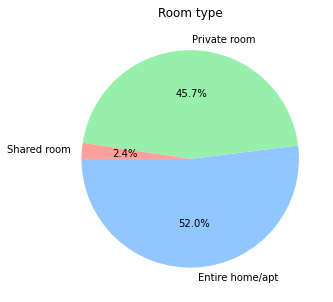

In [22]:
# kokia dalis būstų pagal būsto tipą
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
plt.title('Room type')
plt.pie(df_nyc.room_type.value_counts(), 
        labels=df_nyc.room_type.value_counts().index,
        autopct='%1.1f%%', 
        startangle=180)
plt.show()

In [23]:
# Suskaičiuoju būstų kiekį pagal Niujorko rajonus. 
df_nyc.groupby('neighbourhood_group')['neighbourhood_group'].count().sort_values(ascending = False)

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

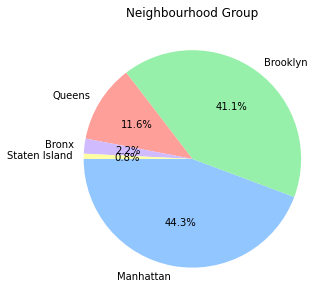

In [24]:
# kokia dalis būstų pagal Niujorko rajonus
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
plt.title('Neighbourhood Group')
plt.pie(df_nyc.neighbourhood_group.value_counts(),
        labels=df_nyc.neighbourhood_group.value_counts().index,
        autopct='%1.1f%%',
        startangle=180)
plt.show()

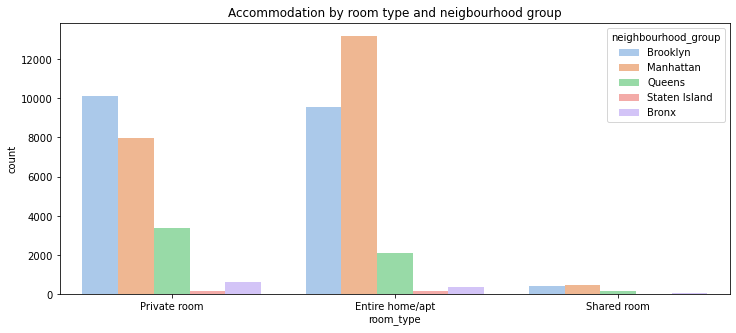

In [25]:
# nuomojamo būsto pasiskirstymas pagal kambario tipą bei rajonus.
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(
    data = df_nyc,
    x='room_type',
    hue ='neighbourhood_group',
    palette='pastel', 
).set(title='Accommodation by room type and neigbourhood group')
plt.show()

In [26]:
# Iš grafiko viršuje galima matyti, jog Brooklyne siūloma daugiau privačių kambarių nei Manhattane, 
# kuris siūlo daugiausiai nuomojamų objektų iš visų. Manhattane yra ženkliai daugiau būstų siūlančių "Entire home/apt"

### 3.2. Būsto kainų analizė

In [27]:
# kaina pagal vidurkį, medianą. Mažiausia, didžiausia kaina.
df_nyc['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [28]:
# duomenys, kai kaina lygi maksimaliai kainai
df_nyc[df_nyc['price'] == 1000]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
host_id,,,,,,,,,,,,
836168,Luxury 1Bed with Central Park Views,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.53,364
273174,Tribeca Loft w/ Private Elevator,Manhattan,Tribeca,40.72008,-74.00430,Entire home/apt,1000,1,25,2019-06-22,0.36,37
836168,Luxury 1 Bedroom Central Park Views,Manhattan,Upper West Side,40.79208,-73.96482,Entire home/apt,1000,30,24,2016-01-27,0.33,364
6414296,Spacious 2 bedroom near Times Sq,Manhattan,Hell's Kitchen,40.75930,-73.99143,Entire home/apt,1000,1,0,NaT,0.00,365
10317189,UWS MANHATTAN APT FOR SUPERBOWL WE,Manhattan,Upper West Side,40.79321,-73.96940,Entire home/apt,1000,1,0,NaT,0.00,0
800720,Sunny Apartment in West Village,Manhattan,West Village,40.73187,-74.00865,Entire home/apt,1000,3,0,NaT,0.00,0
11339193,Large 1-BR Apt w/Fireplace & Patio,Manhattan,Midtown,40.74364,-73.98303,Entire home/apt,1000,3,0,NaT,0.00,0
11385753,An Accomodating Apartment on Wall,Manhattan,Financial District,40.70511,-74.00943,Shared room,1000,1,0,NaT,0.00,0
11483903,Luxury 1 Bedroom Condo,Manhattan,Greenwich Village,40.73411,-73.99723,Entire home/apt,1000,1,0,NaT,0.00,0


In [29]:
# kainų vidurkis pagal būsto tipą
mprice_by_room_type = df_nyc.groupby('room_type')['price'].mean()
np.round(mprice_by_room_type, 2)

room_type
Entire home/apt    211.81
Private room        89.81
Shared room         70.25
Name: price, dtype: float64

In [30]:
# kainų mediana pagal būsto tipą
df_nyc.groupby('room_type')['price'].median()

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

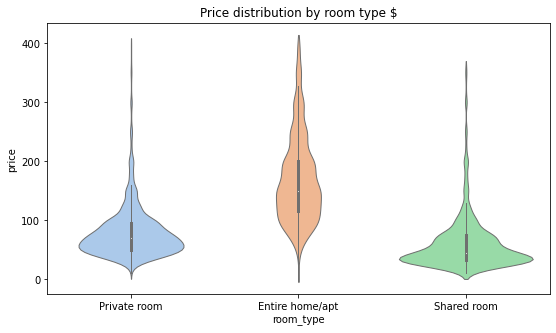

In [31]:
# kainų pasiskirstymas pagal kambario tipą.
price_max_400 = df_nyc[df_nyc["price"] < 400]
fig, ax = plt.subplots(figsize=(9, 5))
sns.violinplot(
    data=price_max_400,
    x="room_type",
    y="price",
    palette="pastel",
    bw=0.2,
    cut=1,
    linewidth=1,
).set_title("Price distribution by room type $")
plt.show()

In [32]:
# "Entire home/apt" kainos pasiskirstę netolygiausiai ir yra brangesnės.
# "Shared room" kainų pasiskirstymas tolygiausias, šio tipo būstai yra pigiausi.

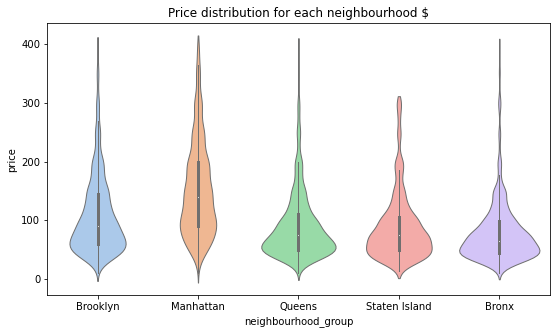

In [33]:
# kainų pasiskirstymas pagal rajonus
fig, ax = plt.subplots(figsize=(9, 5))
sns.violinplot(
    data=price_max_400,
    x="neighbourhood_group",
    y="price",
    palette="pastel",
    bw=0.2,
    cut=1,
    linewidth=1,
).set_title("Price distribution for each neighbourhood $")
plt.show()

In [34]:
# Manhattan kainos pasiskirstę netolygiausiai ir yra brangiausios. Vidurkis apie 140$ kainą.
# Qeens ir Staten Island kainų pasiskirstymas gana panašus. 
# Bronx būsto nuomos kainos pigiausios.

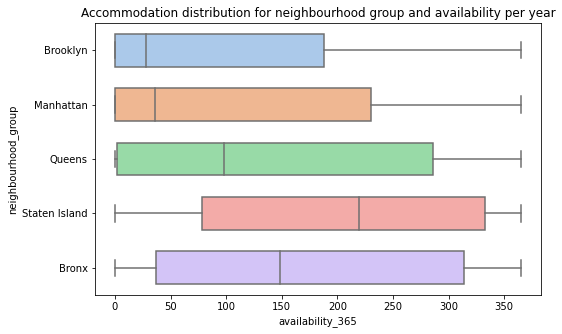

In [35]:
# nuomojamų objektų pasiskirstymas pagal rajoną bei užimtumą_365
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(
    x="availability_365",
    y="neighbourhood_group",
    data=df_nyc,
    whis=[0, 100],
    width=0.6,
    palette="pastel",
).set_title(
    "Accommodation distribution for neighbourhood group and availability per year")
sns.set_palette("Set3")
plt.show()

In [36]:
# prieinamumas didžiausias Bronx bei Staten Island. Mažesnis Brooklyn nei Manhattan.

In [37]:
# išskiriu rajoną, kuriame apsistojama daugiausiai naktų bei kiek naktų.
maximum_nights_neigh = round(
    df_nyc.groupby("neighbourhood_group")["minimum_nights"]
    .agg("mean")
    .nlargest(n=1)
    .sort_values(ascending=False),
    2,
)
maximum_nights_neigh

neighbourhood_group
Manhattan    8.58
Name: minimum_nights, dtype: float64

### 3.3. Analizė pagal kaimynystes

In [38]:
# būstų kiekis pagal kaimynystes. Įvertinu, ar daug yra kaimynysčių.
df_nyc.groupby("neighbourhood")["neighbourhood"].count().sort_values(ascending=False)



neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

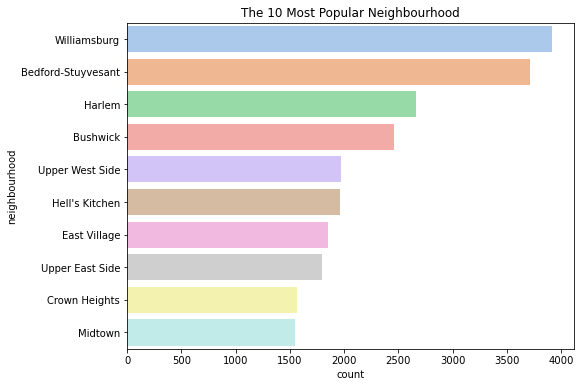

In [39]:
# TOP10 populiariausių kaimynysčių
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(
    y="neighbourhood",
    data=df_nyc,
    palette="pastel",
    order=df_nyc["neighbourhood"].value_counts().index[:10],
).set_title("The 10 Most Popular Neighbourhood")
plt.show()

#sns.countplot(data=df_neigh10, x="neighbourhood_group", palette='pastel', 
#).set(title='Properties by room type and neigbourhood group')
#plt.show()
#ax1.axhline(0, color="k", clip_on=False)
#ax1.set_ylabel("Properties")

In [40]:
# Top10 brangiausių kaimynyčių pagal vidutinę kainą (naudoju kainos medianą).
top_10_neighbourhoods = (
    df_nyc.groupby("neighbourhood")["price"]
    .agg("median")
    .nlargest(n=10)
    .sort_values(ascending=False)
)
top_10_neighbourhoods

neighbourhood
Fort Wadsworth        800.0
Woodrow               700.0
Tribeca               295.0
Neponsit              274.0
NoHo                  250.0
Willowbrook           249.0
Flatiron District     225.0
Midtown               210.0
Financial District    200.0
West Village          200.0
Name: price, dtype: float64

Text(0.5, 0, 'price $')

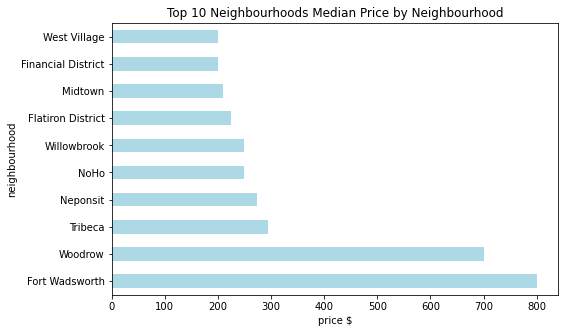

In [41]:
# grafike pateikiu Top10 brangiausių kaimynyčių pagal vidutinę kainą (naudoju kainos medianą).
top_10_neighbourhoods.plot(
    kind="barh",
    title="Top 10 Neighbourhoods Median Price by Neighbourhood",
    color="lightblue",
    figsize=(8, 5),
)
plt.xlabel("price $")

In [42]:
# Brangiausias būstas nuomai yra Fort Wadsworth bei Woodrow kaimynystėse.

In [43]:
# 10 kaimynysčių, kuriose yra žemiausia vidutinė kaina (naudoju kainos medianą).
bottom_10_neighborhoods = (
    df_nyc.groupby("neighbourhood")["price"]
    .agg("median")
    .nsmallest(n=10)
    .sort_values(ascending=True)
)
bottom_10_neighborhoods

neighbourhood
Concord           34.5
Castle Hill       39.0
Corona            40.0
Hunts Point       40.0
New Dorp Beach    40.0
Tremont           41.0
Bull's Head       45.0
Mount Eden        45.5
Soundview         49.0
Whitestone        49.0
Name: price, dtype: float64

Text(0.5, 0, 'price $')

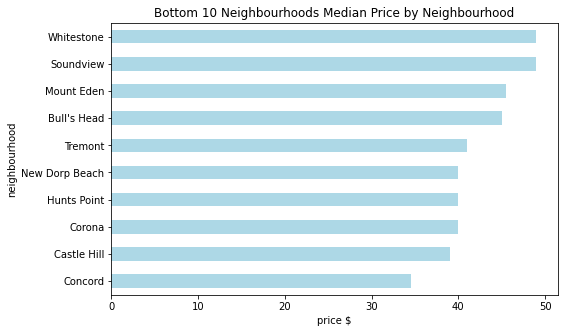

In [44]:
# pigiausios kaimynystės (Bottom10) pagal vidutinę kainą
bottom_10_neighborhoods.plot(
    kind="barh",
    title="Bottom 10 Neighbourhoods Median Price by Neighbourhood",
    color="lightblue",
    figsize=(8, 5),
)
plt.xlabel("price $")

In [45]:
# pigiausias būstas nuomai Concord bei Castle Hill kaimynystėse.

In [46]:
# išskiriu būstus, kuriuose apsistojama daugiausiai naktų.
maximum_nights = round(
    df_nyc.groupby("neighbourhood")["minimum_nights"]
    .agg("mean")
    .nlargest(n=5)
    .sort_values(ascending=False),
    2,
)
maximum_nights

neighbourhood
Spuyten Duyvil       48.25
North Riverdale      41.40
Battery Park City    30.33
Olinville            23.50
Vinegar Hill         18.35
Name: minimum_nights, dtype: float64

In [47]:
# išskiriu kaimynystes, kuriose apsistojama mažiausiai naktų.
minimum_nights = round(
    df_nyc.groupby("neighbourhood")["minimum_nights"]
    .agg("mean")
    .nsmallest(n=5)
    .sort_values(ascending=False),
    2,
)
minimum_nights

neighbourhood
Woodlawn           1.45
East Morrisania    1.33
Oakwood            1.20
Breezy Point       1.00
New Dorp           1.00
Name: minimum_nights, dtype: float64

### 3.4. Duomenų tarpusavio ryšiai

<AxesSubplot:>

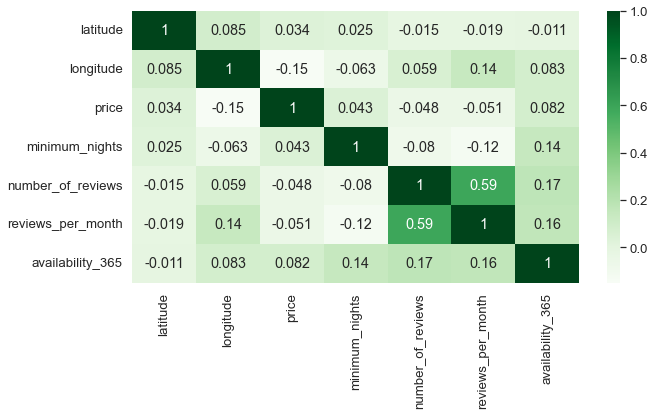

In [48]:
# patikrinsiu kintamųjų tarpusavio ryšius, panaudodama koreliacijos matricą.
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
sns.heatmap(df_nyc.corr(), annot=True, cmap="Greens")

In [49]:
#Nėra stiprių korealiacijos ryšių.
#Matoma koreliacija tarp availability ir minimum nights, reviews.
#no_of_reviews ir reviews_per_month pateikia panašią korealiaciją su kitais duomenimis.

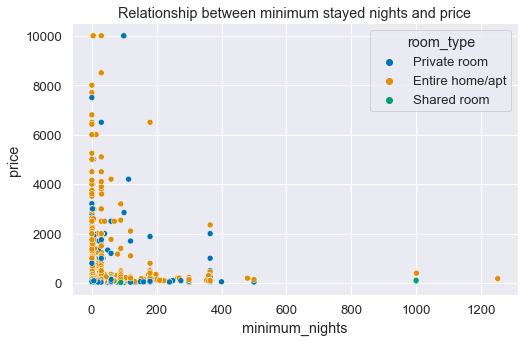

In [50]:
# įvertinu ryšį tarp kainos bei apsistotų naktų trukmės, taip pat duomenis išskiriu pagal būsto tipą.
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(
    data=df_nyc, x="minimum_nights", y="price", hue="room_type", palette="colorblind"
).set_title("Relationship between minimum stayed nights and price")
plt.show()


In [51]:
# Iš grafiko matyti neigiamas ryšys, t.y.kuo didesnė kaina, tuo trumpesnė apsistotų naktų trukmė.

In [52]:
# įdomu, kiek vidutiniškai naktų buvo apsistoję svečiai. Taip pat įdomu, kiek naktų dažniausiai apsistoja.
stayed_nights = df_nyc['minimum_nights'].agg(['mean', 'median'])
stayed_nights

mean      7.029887
median    3.000000
Name: minimum_nights, dtype: float64

AttributeError: 'FacetGrid' object has no attribute 'set_title'

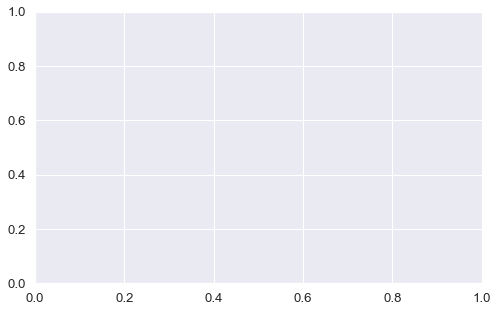

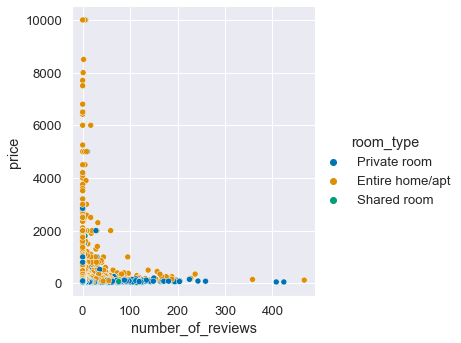

In [77]:
# įvertinu ryšį tarp kainos bei gautų komentarų, taip pat duomenis išskiriu pagal būsto tipą.
fig, ax = plt.subplots(figsize=(8, 5))
sns.relplot(
    data=df_nyc, x="number_of_reviews", y="price", hue="room_type", palette="colorblind"
).set_title("Relationship between price and number of comments")
plt.show()

In [54]:
# Iš grafiko matyti teigiamas ryšys, t.y.kuo daugiau komentarų, tuo mažesnė kaina. 
# Daugiausiai komentarų "Entire home/apt" tipo.

## 3.5 Analizė pagal laikotarpį

In [55]:
# pagal turimus komentarus bei jų laiką, galime nustatyti kada svečiai dažniausiai nuomojasi būstą.
# išskirstau metus ir mėnesius į atskirus stulpelius, kad juos galėčiau naudoti analizei.
# išskiriu kiek last_review buvo kiekvienais metais.
df_nyc['year'] = df_nyc['last_review'].dt.year
df_nyc['month'] = df_nyc['last_review'].dt.month
df_nyc = df_nyc.loc[~((df_nyc['year'] == 2019))]
#df_nyc1 = df_nyc1.dropna()
df_nyc1 = df_nyc.groupby('year')['year'].count().sort_values(ascending=False)
df_nyc1

year
2018.0    6048
2017.0    3204
2016.0    2707
2015.0    1393
2014.0     199
2013.0      48
2012.0      25
2011.0       7
Name: year, dtype: int64

Text(0.5, 1.0, 'AirBnb properties Each Month')

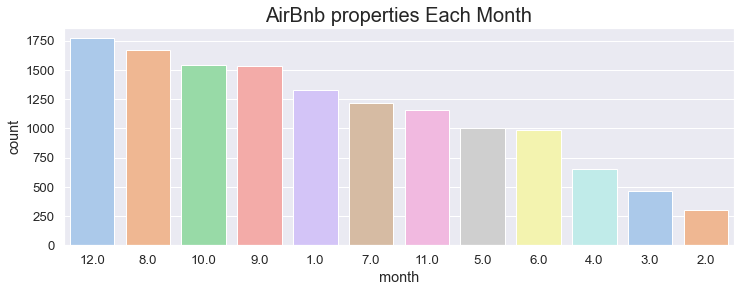

In [56]:
# kuriais mėnesiais daugiausiai nuomojama būstų per visą laikotarpį
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(
    x="month", data=df_nyc, order=df_nyc["month"].value_counts().index, palette="pastel"
)
plt.title("AirBnb properties Each Month", fontsize=20)


In [ ]:
# Aktyviausi mėnesiai nuomai yra: gruodis, rugpjūtis bei spalis. Mažiausias svečių aktyvumas vasario ir kovo mėnesį.

In [57]:
# noriu įvertinti metų sezoniškumą, pasirenku 2018 metus, kadangi, jie paskutiniai metai, kur yra visų metų info.
df_nyc3 = df_nyc[df_nyc['year'] == 2018]
df_nyc3 = df_nyc3.dropna()
df_nyc3.head(2)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,year,month
host_id,,,,,,,,,,,,,,
2787,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365,2018.0,10.0
7192,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0,2018.0,11.0


In [58]:
# nuomos pagal mėnesius
df_nyc4 = df_nyc3.groupby('month')['month'].count().sort_values(ascending=False)
df_nyc4

month
12.0    946
10.0    714
8.0     687
9.0     635
11.0    560
1.0     552
7.0     506
5.0     401
6.0     382
4.0     313
3.0     209
2.0     142
Name: month, dtype: int64

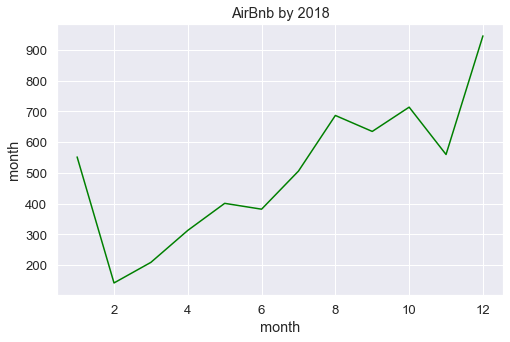

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
gr14 = sns.lineplot(data=df_nyc4, color="green").set_title("AirBnb by 2018")

In [60]:
# iš grafiko matyti, jog mažiausiai būstų nuomojama vasario mėn.,daugiausiai - gruodžio. 
# Tam įtakos turi šventinis laikotarpis.

### 4.6. Grafikas AirBnB pagal vietovę/ rajonus

C:\Users\sandr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

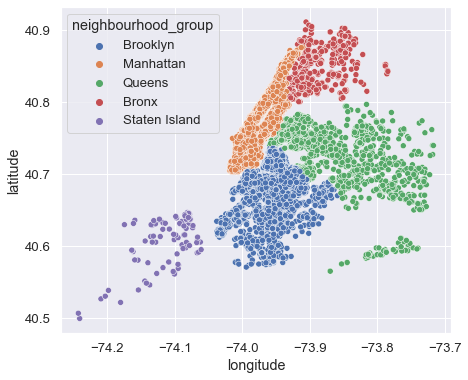

In [61]:
plt.figure(figsize=(7, 6))
sns.scatterplot("longitude", "latitude",
                hue=df_nyc["neighbourhood_group"],
                data=df_nyc)

In [62]:
# nustatau, kuris AirBnb objektas yra populiariausias per nagrinėjamą laikotarpį
df_nyc.value_counts('name').idxmax()

'Hillside Hotel'

In [63]:
# detaliau patikrinu, koks tai objektas
df_nyc[df_nyc['name'] == 'Hillside Hotel'][:1]

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,year,month
host_id,,,,,,,,,,,,,,
134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,90,2017.0,7.0


In [64]:
# nustatau, TOP20 žodžius, kurie būstų pavadinimuose naudojami dažniausiai

names = df_nyc["name"]
name_words = []
for name in names:
    name = str(name).split()
    for word in name:
        name_words.append(word)
print(name_words[:20])


['Clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park', 'THE', 'VILLAGE', 'OF', 'HARLEM....NEW', 'YORK', '!', 'Entire', 'Apt:', 'Spacious', 'Studio/Loft', 'by', 'central']


In [65]:
# sukuriu funkciją, su kuria galima patikrinti, kaip dažnai kiekvienas žodis yra naudojamas būsto pavadinime 
# def is_clean(string):
#    result = 'clean' in string
#    return result

In [66]:
# df_nyc['name'].map(is_clean).sum()  
# rezultatas 331

In [67]:
#!pip install geopandas
#!pip install pyogrio
#!pip install fiona

In [68]:
#!pip uninstall fiona
#!pip install fiona --no-binary fiona

In [69]:
import geopandas as gpd
#import fiona
#import pyogrio

In [70]:
gpd.GeoDataFrame(df_nyc)
gdf_nyc = gpd.GeoDataFrame(
    df_nyc, geometry=gpd.points_from_xy(df_nyc.longitude, df_nyc.latitude)
)

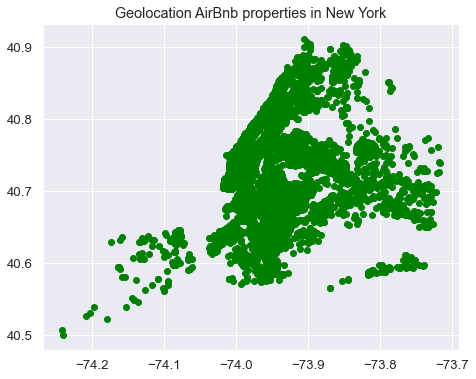

In [71]:
gpd.GeoDataFrame(df_nyc)
gdf_nyc = gpd.GeoDataFrame(
    df_nyc, geometry=gpd.points_from_xy(df_nyc.longitude, df_nyc.latitude))
gdf_nyc.plot(color = 'green', figsize = (10,6))
plt.title('Geolocation AirBnb properties in New York')
plt.show()

In [72]:
# žemėlapiai, ant kurių formuoti grafiką
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# street_map = gpd.read_file('/content/geo_export_1f88d1b8–51fd-42aa-84b0–22d7bad6bc6f.shp')
# street_map = gpd.read_file("C:\Users\sandr\Downloads\Borough Boundaries\geo_export_533bedef-cab2-45a0-b163-7ac832c35c4c.shp")
# world = gpd.read_file('C:/Users/sandr/Downloads/archive/New_York_City_.png')

## Išvados

In [73]:
# Dauguma siūlomų būstų nuomai Niujorke yra privataus namo/apartamento tipo (iš viso tokių būstų yra 52% visų siūlomų).
# Daugiausiai laisvų kambarių turi Staten Island rajonas.
# Manheteno rajono (kuriame yra net 44% visų būstų) užimtumas yra didžiausias, taip pat šiame rajone yra siuloma daugiausiai 
# būsto nuomai. Šiame rajone daugiausiai siūlomi privatūs namai/apartamentai.
# Brooklyne siūloma daugiau privačių kambarių nei Manhattane, 
# Vidutiniškai, imant visus apsistojimus bendrai, svečiai apsistoja 7 dienas, tačiau dažniausiai apsistoja 3 dienas. 
# Ilgiausiai apsistojama Manheteno rajone, t.y. apie 9 dienas. Spuyten Duyvil kaimynystėje apsistojama ilgiausiai, t.y. apie 48 dienas.
# Didžiausias būstų užimtumas yra Brooklino nei Manheteno rajonuose.
# Daugiausiai būstų siūloma Williamsburg kaimynystėje. 
# Vidutinė nuomos kaina Niujorke yra 152.74 $. Tolygiausiai kainos pasiskirsčiusios būstuose su bendrais patogumais, 
# o netolygiausiai privačiuose apartamentuose. Didžiausi kainų skirtumai yra Manhetene.
# Kaip ir tikimasi, privatūs aparatamentai yra brangiausi. pigiausias būstas nuomai Concord bei Castle Hill kaimynystėse.
# Brangiausias būstas nuomai yra Fort Wadsworth bei Woodrow kaimynystėse.
# Daugiausiai naktų apsistojama Spuyten Duyvil kaimynystėje (vidutiniškai 48 naktis). Mažiausiai naktų -Spuyten Duyvil (48.25)
# Daugiausiai apsilankymų buvo Hillside viešbutyje. Populiariausias naudojamas žodis pavadinime yra “Clean”. 
# Pagal visus būsto tipus, pigesni yra būstai, kurie turi mažiau atsiliepimų. 
# Daugiausiai atsiliepimų yra Birželio mėnesį (galime spręsti, jog šis mėnesis yra palankiausias būstų nuomotojams). 
# Vasario mėnesį mažiausiai atsiliepimų, todėl sprendžiama, jog mažiausiai būstų nuomojama šį mėnesį. 


## Tolimesnė analizė

In [74]:
# Būtų svarbu surasti nusikaltamumo duomenis ir panagrinėti, kaip nusikaltimų skaičius rajonuose bei kaimynystėse daro
# įtaką nuomos rinkai. Taip pat turint būsto įvertinimus bei komentarus, būtų galima atlikti detalesnę analizę. 
